# Projeto 1
 Nome:Victor Jurdi
 
 
 Turma:ENG 2A
 

In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from math import *

# Introdução

O projeto tem como objetivo fazer analises de fatores que poderiam afetar o índice de desenvolvimento humano de um país, e a partir disso fazer conclusões razoáveis para descobrir se elas estão de alguma forma ligadas.
Desta forma, foram escolhidas duas variáveis para esta análise, que foram:

°A razão de mulheres para homens na escola primaria e secundária;

°A quantidade da população que utiliza a internet
 
 Para análise, foi escolhido o ano de 2011, por ser um ano em que a internet já fazia uma importante parte no mundo globalizado.

Estas duas variáveis são indicadores de acesso à informação em um país. Portanto, para nortear a análises do projeto tem a seguinte pergunta:

Será que o acesso à informação pode afetar o IDH de um país?


# Pergunta 

Será que o acesso à informação pode afetar no IDH de um país ?

# Leitura dos arquivos




In [84]:
#ratio of girls to boys in primary and secondary education(GE)
#Internet users(IU)
#Human develop index(HDI)
#Gross domestic product(GDE)



GE=pd.read_excel('ratioofgirlstoboysinschool.xlsx')
IU=pd.read_excel('internet_users.xlsx')
HDI=pd.read_excel('hdi_human_development_index.xlsx')







# Mudança de índice








In [85]:
GE_2011=GE.loc[:,['geo',2011]]

IU_2011=IU.loc[:,['geo',2011]]

HDI_2011=HDI.loc[:,['geo',2011]]





GE_2011.rename(columns={'geo':'Country'},inplace=True)

IU_2011.rename(columns={'geo':'Country'},inplace=True)

HDI_2011.rename(columns={'geo':'Country'},inplace=True)



GE_idx = GE_2011.set_index('Country')

IU_idx = IU_2011.set_index('Country')

HDI_idx = HDI_2011.set_index('Country')


GE_idx.head(3)


,2011
Country,
Afghanistan,0.668
Albania,0.979
Algeria,0.994


# Inner join

In [86]:
df = HDI_idx.join(GE_idx, how='inner', lsuffix='_HDI', rsuffix='_GE')

x=df.join(IU_idx,how='inner')

x.rename(columns={2011:'2011_IU'},inplace=True)


h = x.dropna(how='any')
h.head(5)

,2011_HDI,2011_GE,2011_IU
Country,,,
Afghanistan,0.463,0.668,5.0
Albania,0.752,0.979,49.0
Algeria,0.732,0.994,14.9
Angola,0.508,0.621,3.1
Antigua and Barbuda,0.778,0.952,52.0


# Gráficos Conclusivos


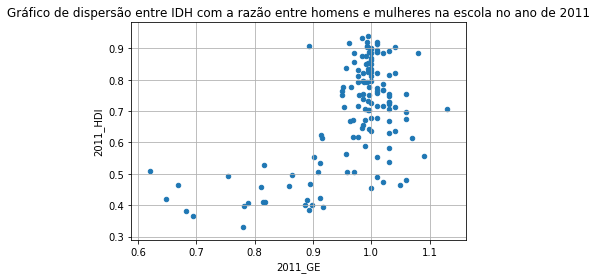

In [87]:
x.plot.scatter(x="2011_GE",y="2011_HDI");
plt.title('Gráfico de dispersão entre IDH com a razão entre homens e mulheres na escola no ano de 2011')
plt.grid(True)

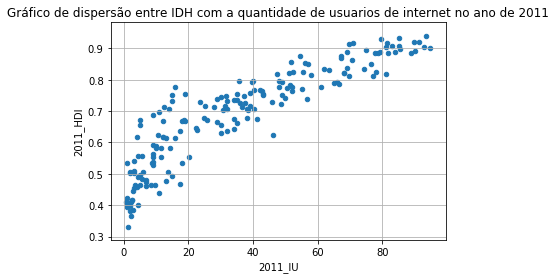

In [88]:
x.plot.scatter(x="2011_IU",y="2011_HDI");
plt.title('Gráfico de dispersão entre IDH com a quantidade de usuarios de internet no ano de 2011')
plt.grid(True)

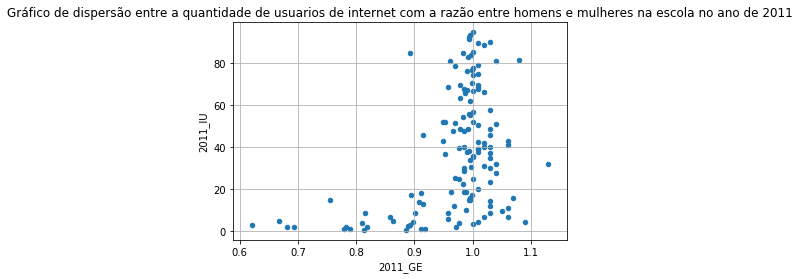

In [89]:
x.plot.scatter(x="2011_GE",y="2011_IU",);
plt.title('Gráfico de dispersão entre a quantidade de usuarios de internet com a razão entre homens e mulheres na escola no ano de 2011')
plt.grid(True)

In [90]:
def reta(dados_x, dados_y, nome_x = "2011_IU", nome_y = "2011_HDI"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre  2011_IU   e  2011_HDI :
Coeficiente linear: 0.5057790113311609
Coeficiente angular: 0.005043142437602144


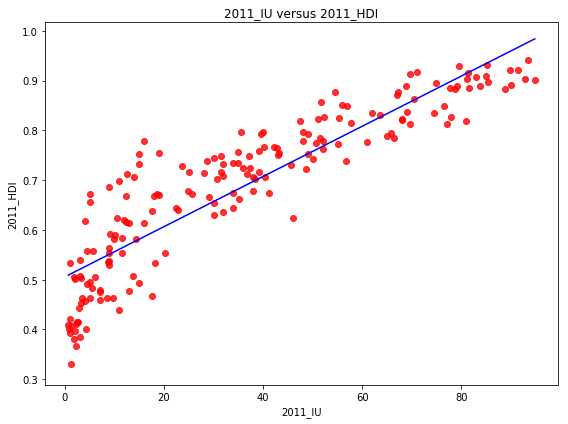

In [91]:
reta(x["2011_IU"], x["2011_HDI"])

In [92]:
def reta(dados_x, dados_y, nome_x = "2011_GE", nome_y = "2011_HDI"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre  2011_GE   e  2011_HDI :
Coeficiente linear: -0.376693607437216
Coeficiente angular: 1.0961906487333255


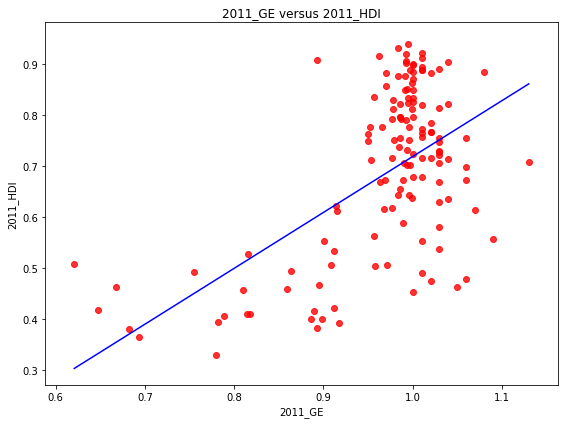

In [93]:
reta(x["2011_GE"], x["2011_HDI"])

In [94]:
def reta(dados_x, dados_y, nome_x = "2011_GE", nome_y = "2011_IU"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre  2011_GE   e  2011_IU :
Coeficiente linear: -89.0692807422729
Coeficiente angular: 128.5729051859623


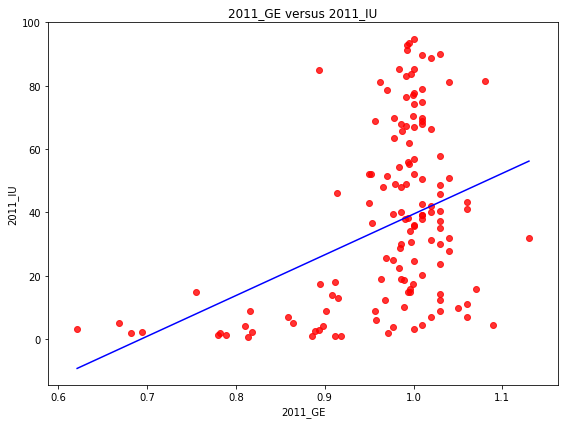

In [95]:
reta(x["2011_GE"], x["2011_IU"])

# Ratio of girls to boys in primary and secondary education(GE)

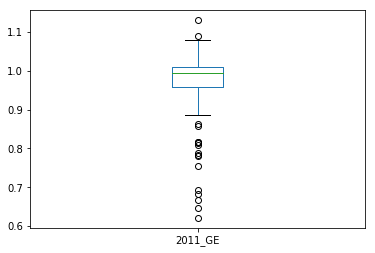

In [96]:
x.loc[:, "2011_GE"].plot.box();

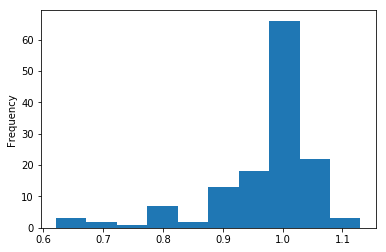

In [97]:
x["2011_GE"].plot(kind='hist', density=False);

Analisando o boxplot e o histograma acima sobre a razão de homens e mulheres na escola, pode-se notar uma grande quantidade de "outliers".


In [98]:
x.corr()

,2011_HDI,2011_GE,2011_IU
2011_HDI,1.000000,0.581878,0.896155
2011_GE,0.581878,1.000000,0.414909
2011_IU,0.896155,0.414909,1.000000


# Conclusão

    Ao levantar os dados, pode-se determinar que a correlação entre o IDH e a população usuária de internet é razoavelmente     alta, por outro lado, quando correlaciona-se a razão de mulheres para homens na escola com o IDH, percebe-se que o coeficiente de correlação pearson não é tão elevado, mas o cáculo deste coeficiente pode ter sido afetado, pela quantidade de "outliers" que esta variável apresenta. 
    Ao fazer o gráfico de disperção de uma variável pela outra(IU/GE), pode-se notar que a correlação entre elas é baixa.
    
    
    Fazendo uma análise geral do projeto, pode-se inferir que de certa forma há uma relação entre o IDH e com o acesso a informação, o que já era esperado, pois essas duas variáveis escolhidas tendem a aumentar conforme o país é mais desenvolvido.

